# Data Validation

In [2]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Dataset
df = pd.read_csv("F:/Portfolio Projects/Sales Strategy Analysis/product_sales.csv")
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
# Checking for missing values
print(df.isna().sum())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [6]:
# Checking for unique values
print(df.nunique())

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64


In [7]:
# Checking the unique values of sales method
df["sales_method"].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [8]:
# Replacing the wrong values in the "sales_method" column
df["sales_method"] = df["sales_method"].replace({"em + call": "Email + Call", "email":
"Email"})
# Checking after the replacement
df["sales_method"].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [9]:
# Checking the "state" column
df["state"].value_counts()

state
California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode

In [10]:
# Descriptive Statistics of the numerical variables
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [11]:
# Investigating the records contains years_as_customer more than 40, as the company was established 40 years ago and more than 40 is impossible
years_as_customer_above_40 = df[df["years_as_customer"] > 40]
years_as_customer_above_40

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [12]:
# Removing the two rows containing wrong values in "years_as_customer"
df_correctd = df[df["years_as_customer"] <= 40]
df_correctd["years_as_customer"].value_counts()

years_as_customer
1     2504
2     1987
3     1619
0     1471
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
22      43
21      37
24      27
26      22
23      21
25      19
27      15
30       9
28       8
34       8
33       8
31       6
35       5
29       5
32       5
36       4
39       3
38       2
37       2
Name: count, dtype: int64

In [13]:
# Dimension of the updated dataset
df_correctd.shape

(14998, 8)

In [14]:
# Proportion of missing values in the 'revenue' column
(df_correctd["revenue"].isna().sum()/df_correctd["revenue"].count())*100

np.float64(7.713300775639184)

In [15]:
# Importing Libraries for Little's MCAR Test

import missingno as msno
import pandas as pd
from scipy import stats

# Assuming df_correctd is already defined
df_cleaned = df_correctd.dropna(how='all')

# Little's MCAR Test
def little_mcar_test(data):
    n, m = data.shape
    data = data.copy()
    data['missing'] = data.isnull().sum(axis=1)
    observed = data['missing'].value_counts().sort_index()
    expected = stats.binom.pmf(observed.index, m, data.isnull().mean().mean()) * n
    chi_square = ((observed - expected) ** 2 / expected).sum()
    p_value = 1 - stats.chi2.cdf(chi_square, df=len(observed) - 1)
    return p_value

p_value_mcar = little_mcar_test(df_cleaned)
print("p-value from Little's MCAR Test:", p_value_mcar)

if p_value_mcar > 0.05:
    print("Fail to reject the null hypothesis - Data is MCAR")
else:
    print("Reject the null hypothesis - Data is not MCAR")

p-value from Little's MCAR Test: 5.535514602250657e-09
Reject the null hypothesis - Data is not MCAR


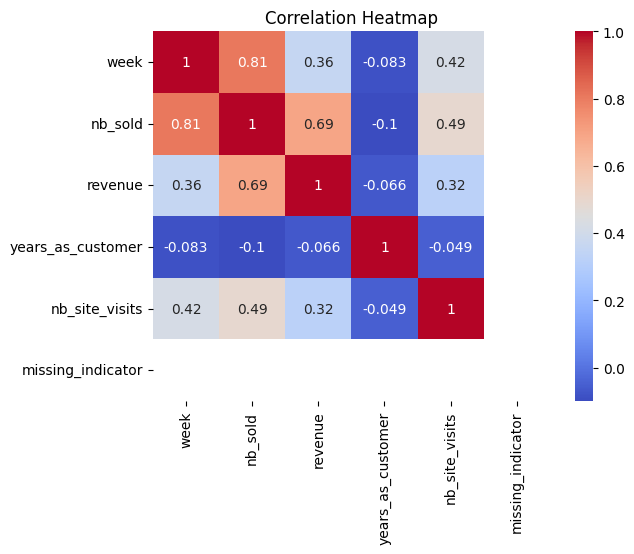

In [ ]:
# Adding a missing indicator column using .loc[]
df_correctd.loc[:, "missing_indicator"] = df_correctd["revenue"].isnull().astype(int)

# Selecting only numeric columns for the correlation matrix
numeric_df = df_correctd.select_dtypes(include=[np.number])

# Correlation Heatmap
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Checking for association with the columns containing text/categorical data
df_MAR = df_correctd.drop("customer_id", axis=1)
from scipy.stats import chi2_contingency
for col in df_MAR.select_dtypes(include='object'):
    contingency_table = pd.crosstab(df[col], df_MAR['missing_indicator'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-squared test for {col}: p-value = {p}')

Chi-squared test for sales_method: p-value = 2.954295391738752e-55
Chi-squared test for state: p-value = 0.7759079616335645


In [19]:
# Mean, Median, and Standard Deviation of revnue grouped by sales_method to decide whether to impute mean or median in the missing values
df_correctd.groupby("sales_method")["revenue"].agg(['mean', 'median', 'std'])

,mean,median,std
sales_method,,,
Call,47.596866,49.05,8.610699
Email,97.127671,95.58,11.211279
Email + Call,183.651233,184.74,29.083924


In [24]:
# Creating an explicit copy of the DataFrame to avoid warnings
df_impute = df_correctd.copy()

# Filling missing values with the median of the respective sales method groups
df_impute.loc[:, "revenue"] = df_impute.groupby('sales_method')['revenue'].transform(lambda x: x.fillna(x.median()))

# Checking for missing values
print(df_impute.isna().sum())


week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
missing_indicator    0
dtype: int64


In [21]:
# Final Dataset for the Analysis
df_final = df_impute.reset_index(drop=True)

# Exploratory Analysis

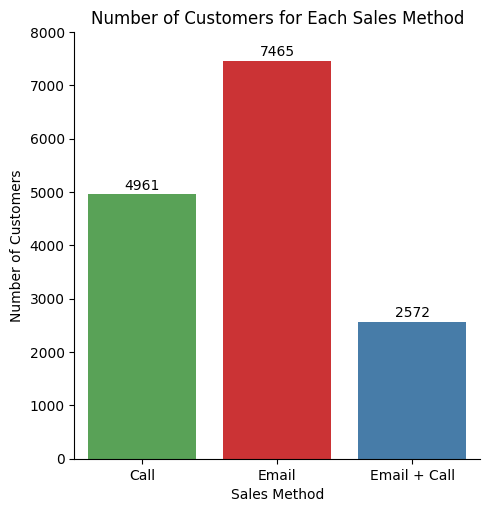

In [ ]:
# How Many customers were there for each approach?

import seaborn as sns
import matplotlib.pyplot as plt

# Counting Number of Customers for Each Method
cust_count_each_approach = sns.catplot(x='sales_method', data=df_final, kind="count",
hue= "sales_method", order=["Call", "Email", "Email + Call"], palette="Set1")

# Get the Axes object from the FacetGrid
ax = cust_count_each_approach.ax

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, padding=1)

# Set labels and limits
ax.set_xlabel("Sales Method")
ax.set_ylabel("Number of Customers")
ax.set_ylim(0, 8000)

# Set the title
ax.set_title('Number of Customers for Each Sales Method')
plt.show()


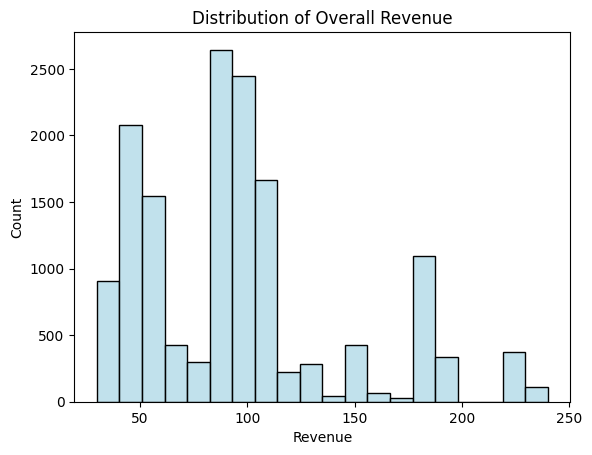

In [25]:
# What does the spread of the revenue look like overall? And for each method?

# Spread of Overall Revenue
sns.histplot(x='revenue', data=df_final, bins=np.linspace(30, 240, 21),
color="lightblue")
plt.title("Distribution of Overall Revenue")
plt.xlabel("Revenue")
plt.show()

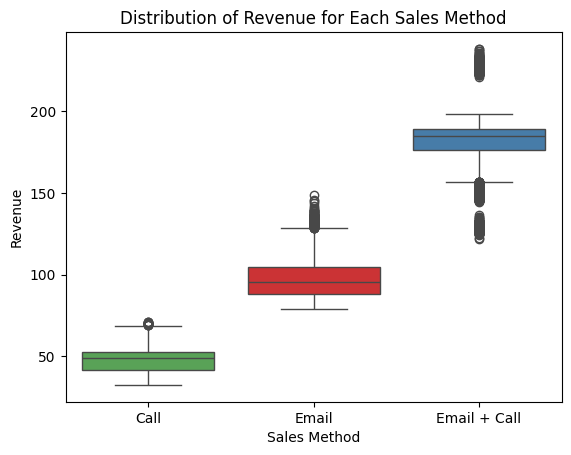

In [26]:
# Spread of Revenue by Sales Method

sns.boxplot(x="sales_method", y="revenue", data=df_final, hue="sales_method", order =
["Call", "Email", "Email + Call"], palette="Set1")
plt.title("Distribution of Revenue for Each Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue")
plt.show()

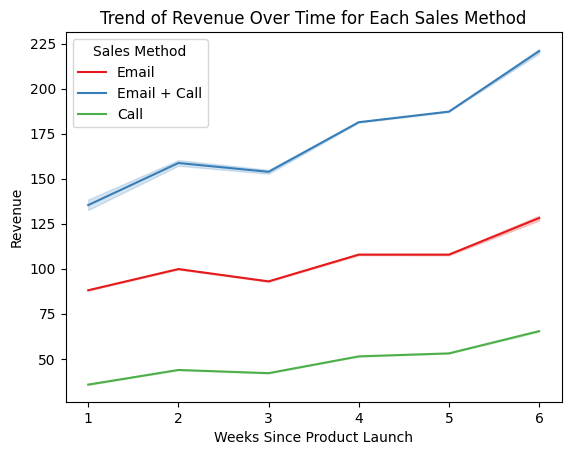

In [27]:
# Was there any differences in revenue over time for each of the method?

sns.lineplot(x="week", y="revenue", data=df_final, hue="sales_method", markers=True,
palette="Set1")
plt.xlabel("Weeks Since Product Launch")
plt.ylabel("Revenue")
plt.title("Trend of Revenue Over Time for Each Sales Method")
plt.legend(title="Sales Method")
plt.show()

C:\Users\niloy\AppData\Local\Temp\ipykernel_19108\2501593823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


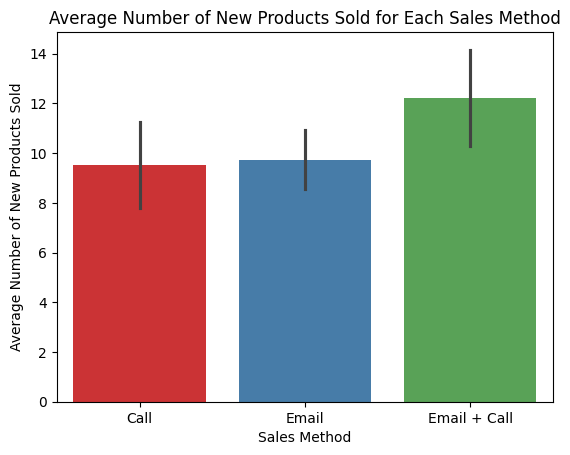

In [ ]:
# Average Number of New Products Sold for Each Sales Method

import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot with updated `hue` mapping and suppressed legend
sns.barplot(
    x="sales_method", y="nb_sold", data=df_final,
    hue="sales_method", palette="Set1", order=["Call", "Email", "Email + Call"],
    errorbar='sd', legend=False
)

# Adding labels and title
plt.title("Average Number of New Products Sold for Each Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Average Number of New Products Sold")

# Display the plot
plt.show()



Text(0, 0.5, 'Number of Website Visit')

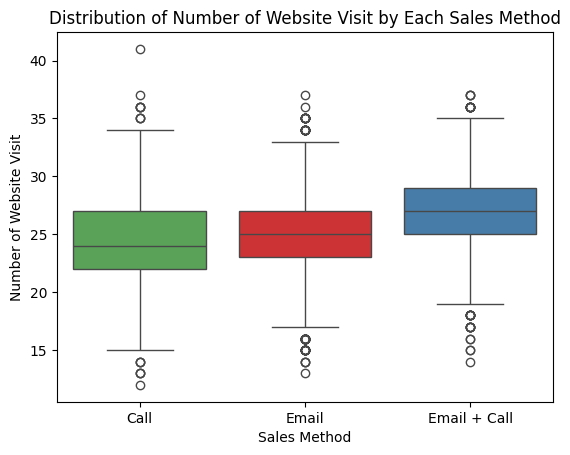

In [30]:
# Distribution of Number of Website Visit by Each Sales Method

sns.boxplot(data=df_final, x="sales_method", y="nb_site_visits", hue="sales_method",
order=["Call", "Email", "Email + Call"], palette="Set1")
plt.title("Distribution of Number of Website Visit by Each Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of Website Visit")

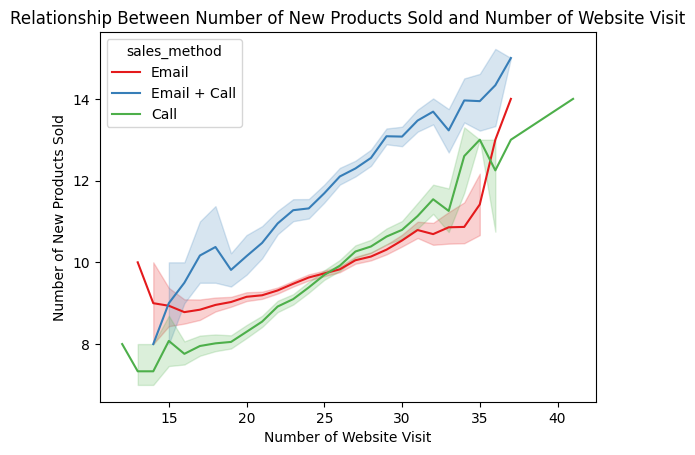

In [31]:
# Relationship Between Number of New Products Sold and Number of Website Visit

sns.lineplot(x="nb_site_visits", y="nb_sold", data=df_final, hue="sales_method",
palette="Set1")
plt.title("Relationship Between Number of New Products Sold and Number of Website Visit")
plt.xlabel("Number of Website Visit")
plt.ylabel("Number of New Products Sold")
plt.show()

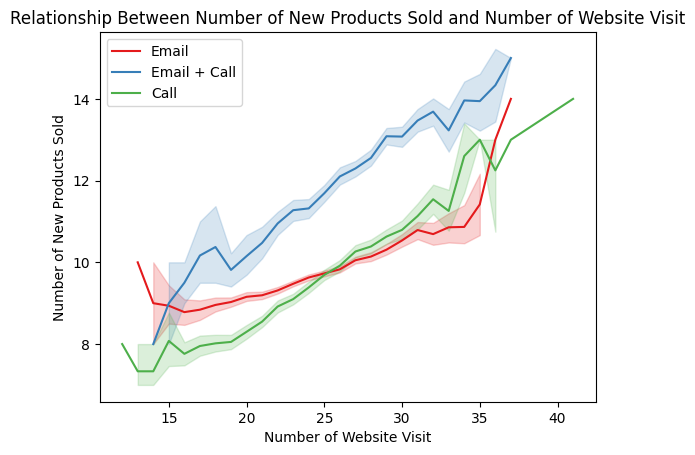

In [35]:

# Relationship Between Number of New Products Sold and Number of Website Visit

sns.lineplot(x="nb_site_visits", y="nb_sold", data=df_final, hue="sales_method",
palette="Set1")
plt.title("Relationship Between Number of New Products Sold and Number of Website Visit")
plt.xlabel("Number of Website Visit")
plt.ylabel("Number of New Products Sold")
plt.legend(loc="upper left")
plt.show()


In [38]:
grouped_1 = df_final.groupby('sales_method').agg({
'revenue': 'sum',
'nb_sold': 'sum'
}).reset_index()

# Calculate total revenue and total nb_sold for percentage calculations
total_revenue = df_final['revenue'].sum()
total_nb_sold = df_final['nb_sold'].sum()

# Calculate percentage of total revenue and total nb_sold for each sales method
grouped_1['revenue_percentage'] = (grouped_1['revenue'] / total_revenue) * 100
grouped_1['nb_sold_percentage'] = (grouped_1['nb_sold'] / total_nb_sold) * 100
# Display the result

print(round(grouped_1, 2))



   sales_method    revenue  nb_sold  revenue_percentage  nb_sold_percentage
0          Call  236391.07    47177               16.49               31.19
1         Email  724216.13    72629               50.53               48.02
2  Email + Call  472730.95    31444               32.98               20.79


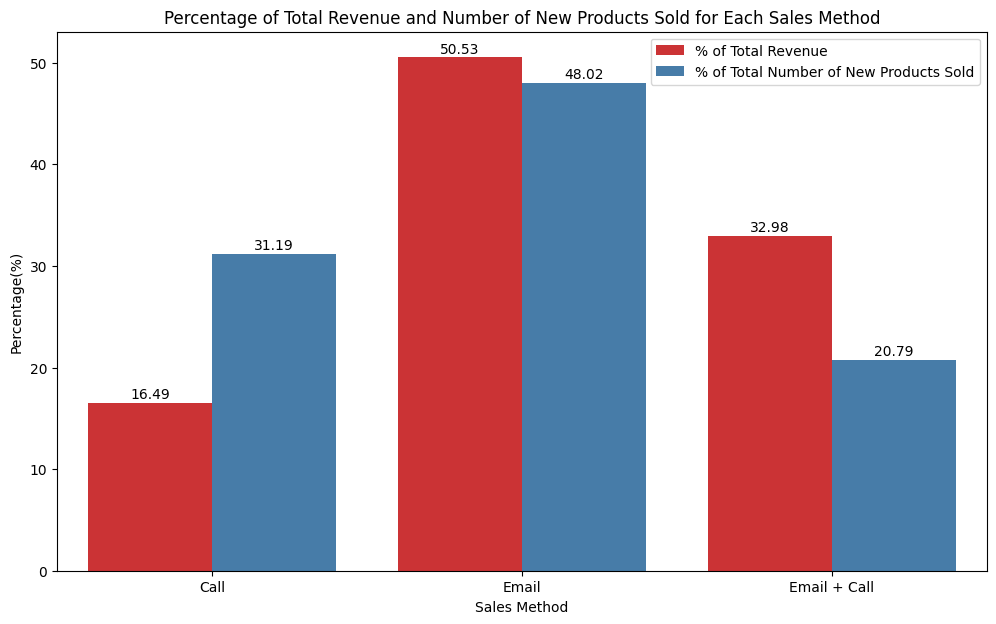

In [39]:
# Reshape the DataFrame for easier plotting
grouped_melted = pd.melt(grouped_1, id_vars='sales_method', 
                         value_vars=['revenue_percentage', 'nb_sold_percentage'], 
                         var_name='Legend', value_name='Percentage')

label_dict = {"revenue_percentage": "% of Total Revenue", 
     "nb_sold_percentage": "% of Total Number of New Products Sold"}

# Create the grouped bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='sales_method', y='Percentage', hue='Legend', data=round(grouped_melted,2), palette="Set1")

# Add labels and title
plt.title('Percentage of Total Revenue and Number of New Products Sold for Each Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Percentage(%)')

handles, labels = ax.get_legend_handles_labels()
new_labels = [label_dict[label] for label in labels]
plt.legend(handles=handles, labels=new_labels)
           
# Add bar labels
for container in ax.containers:
    ax.bar_label(container, padding=1)

# Show the plot
plt.show()

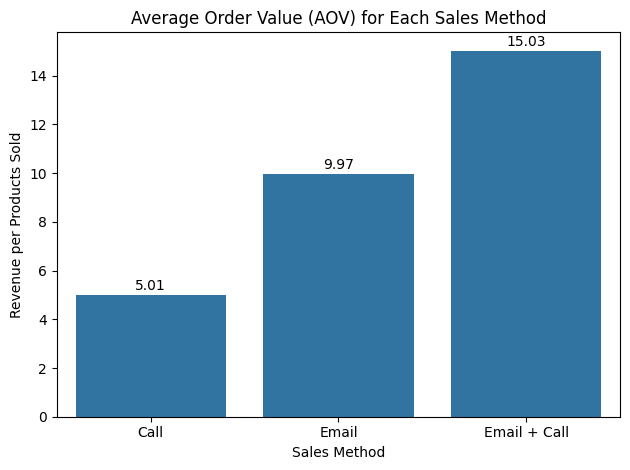

In [ ]:
# Average Order Value (AOV) for Each Sales Method

grouped = df_final.groupby('sales_method').agg({
    'revenue': 'sum',
    'nb_sold': 'sum'
}).reset_index()

# Calculate total revenue and total nb_sold for percentage calculations
total_revenue = df_final['revenue'].sum()
total_nb_sold = df_final['nb_sold'].sum()

# Calculate percentage of total revenue and total nb_sold for each sales method
grouped['revenue_per_item_sold'] = (grouped['revenue'] / grouped['nb_sold'])

ax = sns.barplot(x="sales_method", y="revenue_per_item_sold", data=round(grouped, 2))
plt.title("Average Order Value (AOV) for Each Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue per Products Sold")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, padding=1)
plt.tight_layout()
# Show the plot
plt.show()

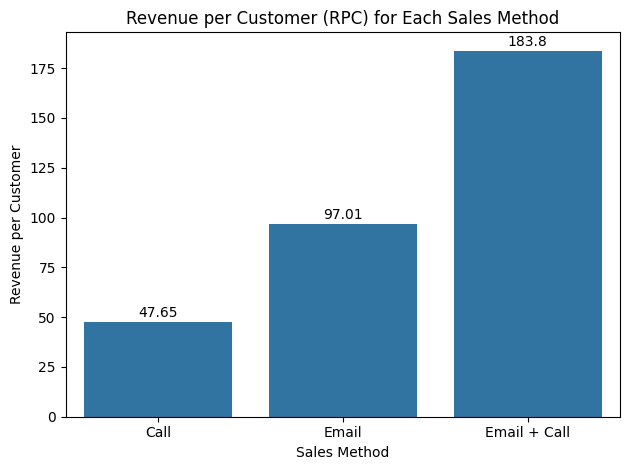

In [ ]:
# Revenue per Customer (RPC) for Each Sales Method
grouped_1 = df_final.groupby('sales_method').agg({
    'revenue': 'sum',         # Sum of revenue
    'sales_method': 'count'   # Count the number of customers
}).rename(columns={'sales_method': 'num_customers'}).reset_index()

# Calculate revenue per customer for each sales method
grouped_1['revenue_per_customer'] = grouped_1['revenue'] / grouped_1['num_customers']

# Create the bar plot
ax = sns.barplot(x="sales_method", y="revenue_per_customer", data=round(grouped_1, 2))

# Set plot title and labels
plt.title("Revenue per Customer (RPC) for Each Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue per Customer")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, padding=1)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()